In [1]:
import osmnx as ox

In [5]:
G_lisboa = ox.graph_from_place("Lisboa", network_type="all", simplify=False)

In [6]:
print(type(G_lisboa))
print(G_lisboa)

<class 'networkx.classes.multidigraph.MultiDiGraph'>
MultiDiGraph with 127938 nodes and 246974 edges


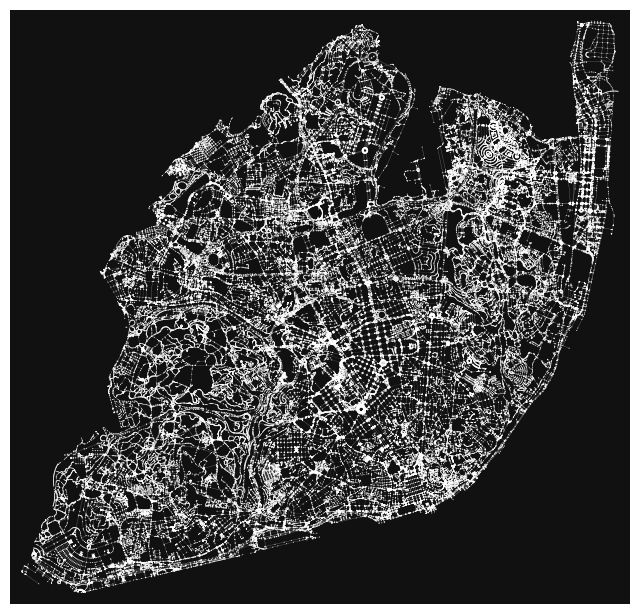

In [9]:
fig, ax = ox.plot_graph(G_lisboa, node_size=0.5, edge_linewidth=0.1)

In [7]:
G_krakow = ox.graph_from_place("Kraków", network_type="all", simplify=False)

In [8]:
print(G_krakow)

MultiDiGraph with 333120 nodes and 721628 edges


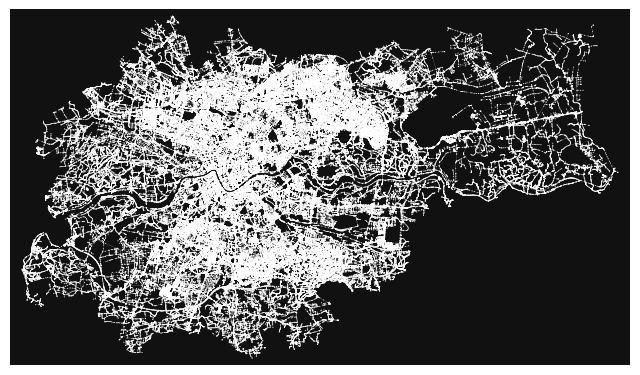

In [10]:
fig, ax = ox.plot_graph(G_krakow, node_size=0.5, edge_linewidth=0.1)

In [15]:
# G_simplified = ox.simplify_graph(G)
# print(G_simplified)

MultiDiGraph with 37593 nodes and 95301 edges


### Save chosen graph

In [11]:
ox.save_graphml(G_lisboa, "./data/lisboa.graphml")

In [12]:
ox.save_graphml(G_krakow, "./data/krakow.graphml")

In [21]:
# ox.settings.all_oneway = True
# G_all_oneway = ox.graph_from_place("Lisboa", network_type="all", simplify=True)
# ox.save_graph_xml(G_all_oneway, filepath="./data/lisboa.osm")